dataset : Yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

In [3]:
import pyarrow.parquet as pq
import pandas as pd

def parquet_to_csv(parquet_file_path, csv_file_path):
    # Read the Parquet file into a PyArrow Table
    table = pq.read_table(parquet_file_path)
    
    # Convert the PyArrow Table to a Pandas DataFrame
    df = table.to_pandas()
    
    # Write the DataFrame to a CSV file
    df.to_csv(csv_file_path, index=False)
    print(f"Parquet file has been converted to {csv_file_path}")

# Specify the path to your Parquet file and the output CSV file
parquet_file_path = 'D:/ML Models/Big Data Mining/Data/yellow_tripdata_2022-10.parquet'
csv_file_path = 'D:/ML Models/Big Data Mining/Data/yellow_tripdata_2022-10.csv'

# Call the function to convert Parquet to CSV
parquet_to_csv(parquet_file_path, csv_file_path)


Parquet file has been converted to D:/ML Models/Big Data Mining/Data/yellow_tripdata_2022-10.csv


In [4]:
import sys
import os

# Assuming PySpark is installed in the default location
pyspark_path = os.path.join(os.path.expanduser("~"), ".local", "lib", "python3.8", "site-packages", "pyspark")

# Add the PySpark directory to sys.path
sys.path.append(pyspark_path)



In [1]:
import pyspark

print(pyspark.__file__)


c:\Users\Nilakshi\anaconda3\lib\site-packages\pyspark\__init__.py


In [5]:
# Load and explore the data

from pyspark.sql import SparkSession 
import pandas as pd

# Initialize Spark session
# SparkSession provides a way to interact with various Spark functionalities and create and manage DataFrames and datasets
spark = SparkSession.builder.appName("NYC_Taxi_Trip_Analysis").getOrCreate()

# Load the data
file_path = 'D:/ML Models/Big Data Mining/Data/yellow_tripdata_2022-10.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show basic info
df.printSchema()
df.show(5)


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+

In [6]:
# Remove rows with null values
df_clean = df.dropna()

# Filter trips with non-sensical trip durations or distances
df_clean = df_clean.filter((df_clean.trip_distance > 0) & (df_clean.fare_amount > 0))

# Extract relevant datetime information
from pyspark.sql.functions import col, hour, dayofweek, month

# Derive pickup hour, pickup day of week, pickup month
df_clean = df_clean.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))
df_clean = df_clean.withColumn("pickup_dayofweek", dayofweek(col("tpep_pickup_datetime")))
df_clean = df_clean.withColumn("pickup_month", month(col("tpep_pickup_datetime")))

df_clean.show(5)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-----------+----------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|pickup_hour|pickup_dayofweek|pickup_month|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-----------+----------------+------------+
|       1| 2022-10-01 00:03:41|  2022-10-01 00:18:39|        

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to pandas for EDA
pandas_df = df_clean.toPandas()

# Plot trip counts by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=pandas_df)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# Plot trip counts by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_dayofweek', data=pandas_df)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()


Py4JJavaError: An error occurred while calling o74.collectToPython.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.sql.execution.SparkPlan$$anon$1._next(SparkPlan.scala:415)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.getNext(SparkPlan.scala:426)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.getNext(SparkPlan.scala:412)
	at org.apache.spark.util.NextIterator.hasNext(NextIterator.scala:73)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.util.NextIterator.foreach(NextIterator.scala:21)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1(SparkPlan.scala:449)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1$adapted(SparkPlan.scala:448)
	at org.apache.spark.sql.execution.SparkPlan$$Lambda/0x0000021f03f84000.apply(Unknown Source)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:448)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4148)
	at org.apache.spark.sql.Dataset$$Lambda/0x0000021f03f3e5b0.apply(Unknown Source)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.Dataset$$Lambda/0x0000021f03cb44b0.apply(Unknown Source)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset$$Lambda/0x0000021f03bd21c8.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda/0x0000021f03bd5950.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda/0x0000021f03bd2490.apply(Unknown Source)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4145)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)


This error typically occurs when Spark runs out of memory (Java heap space). Spark requires sufficient memory to process large datasets, and the default memory settings might not be adequate for your dataset size or processing operations.

Steps followed to get rid of the error : 
Increased the memory space of spark driver and executor.(8GB)

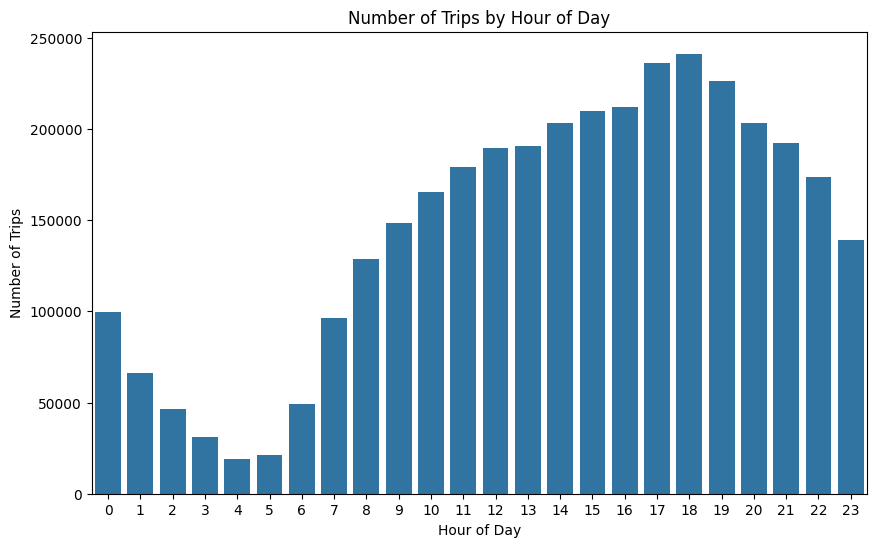

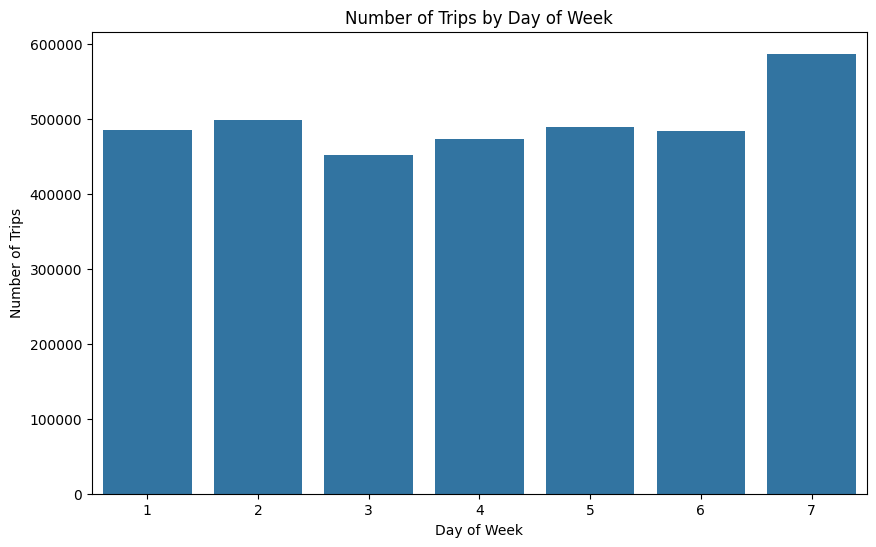

In [7]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Spark session
spark = SparkSession.builder \
    .appName("Big Data Analysis") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()



# Extract hour and day of week from the pickup datetime
df_clean = df_clean.withColumn("pickup_hour", F.hour(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("pickup_dayofweek", F.dayofweek(df_clean["tpep_pickup_datetime"]))


#Instead of converting the entire dataset (df_clean) to a Pandas DataFrame (pandas_df) at once, the code aggregates 
#data first using Spark operations (groupBy, orderBy, etc.), then converts the aggregated results (hourly_counts and daily_counts) 
#to Pandas DataFrames (hourly_counts_pd and daily_counts_pd).

# Aggregate data by hour and day of week
hourly_counts = df_clean.groupBy("pickup_hour").count().orderBy("pickup_hour")
daily_counts = df_clean.groupBy("pickup_dayofweek").count().orderBy("pickup_dayofweek")

# Convert aggregated data to pandas
hourly_counts_pd = hourly_counts.toPandas()
daily_counts_pd = daily_counts.toPandas()

# Plot trip counts by hour
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_hour', y='count', data=hourly_counts_pd)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# Plot trip counts by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_dayofweek', y='count', data=daily_counts_pd)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()


In [8]:
# Create feature columns
feature_columns = ['pickup_hour', 'pickup_dayofweek', 'trip_distance']

# Convert to VectorAssembler format
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df_features = assembler.transform(df_clean)

df_features.select('features', 'fare_amount').show(5)


+--------------+-----------+
|      features|fare_amount|
+--------------+-----------+
| [0.0,7.0,1.7]|        9.5|
|[0.0,7.0,0.72]|        5.5|
|[0.0,7.0,1.74]|        9.0|
| [0.0,7.0,1.3]|        6.5|
| [0.0,7.0,1.0]|        6.0|
+--------------+-----------+
only showing top 5 rows



In [9]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Split the data
train_data, test_data = df_features.randomSplit([0.8, 0.2], seed=1234)

# Initialize and train the model
lr = LinearRegression(labelCol='fare_amount')
lr_model = lr.fit(train_data)

# Evaluate the model
test_results = lr_model.evaluate(test_data)
print(f'R2: {test_results.r2}')
print(f'RMSE: {test_results.rootMeanSquaredError}')


R2: -0.005522273072238848
RMSE: 13.616772032372767


In [10]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Spark session
spark = SparkSession.builder \
    .appName("Big Data Analysis") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# Load the Parquet file into a Spark DataFrame
df_clean = spark.read.parquet('Data/yellow_tripdata_2022-10.parquet')

# Extract hour and day of week from the pickup datetime
df_clean = df_clean.withColumn("pickup_hour", F.hour(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("pickup_dayofweek", F.dayofweek(df_clean["tpep_pickup_datetime"]))

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=["pickup_hour", "pickup_dayofweek"], outputCol="features")
df_features = assembler.transform(df_clean)

# Split the data into training and test sets
train_data, test_data = df_features.randomSplit([0.8, 0.2], seed=1234)

# Initialize and train a linear regression model
lr = LinearRegression(featuresCol="features", labelCol="trip_distance")
lr_model = lr.fit(train_data)

# Make predictions on the test set
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R²:", r2)

evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("RMSE:", rmse)


R²: -3.815370590354306e-06
RMSE: 482.2297083048705


In [11]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Spark session
spark = SparkSession.builder \
    .appName("Big Data Analysis") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# Load the Parquet file into a Spark DataFrame
df_clean = spark.read.parquet('Data/yellow_tripdata_2022-10.parquet')

# Extract hour and day of week from the pickup datetime
df_clean = df_clean.withColumn("pickup_hour", F.hour(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("pickup_dayofweek", F.dayofweek(df_clean["tpep_pickup_datetime"]))

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=["pickup_hour", "pickup_dayofweek"], outputCol="features")
df_features = assembler.transform(df_clean)

# Split the data into training and test sets
train_data, test_data = df_features.randomSplit([0.8, 0.2], seed=1234)

# Initialize and train a Random Forest model
rf = RandomForestRegressor(featuresCol="features", labelCol="trip_distance")
rf_model = rf.fit(train_data)

# Make predictions on the test set
predictions = rf_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R²:", r2)

evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("RMSE:", rmse)


R²: 5.137504871699505e-05
RMSE: 482.21640094212887


In [12]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Spark session
spark = SparkSession.builder \
    .appName("Big Data Analysis") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# Load the Parquet file into a Spark DataFrame
df_clean = spark.read.parquet('Data/yellow_tripdata_2022-10.parquet')

# Extract hour and day of week from the pickup datetime
df_clean = df_clean.withColumn("pickup_hour", F.hour(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("pickup_dayofweek", F.dayofweek(df_clean["tpep_pickup_datetime"]))

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=["pickup_hour", "pickup_dayofweek"], outputCol="features")
df_features = assembler.transform(df_clean)

# Split the data into training and test sets
train_data, test_data = df_features.randomSplit([0.8, 0.2], seed=1234)

# Initialize and train a Gradient Boosting model
gbt = GBTRegressor(featuresCol="features", labelCol="trip_distance", maxIter=100)
gbt_model = gbt.fit(train_data)

# Make predictions on the test set
predictions = gbt_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R²:", r2)

evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("RMSE:", rmse)


R²: -6.575567847444397e-05
RMSE: 482.2446427449343


In [13]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Create a Spark session
spark = SparkSession.builder \
    .appName("Big Data Analysis") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# Load the Parquet file into a Spark DataFrame
df_clean = spark.read.parquet('data/yellow_tripdata_2022-10.parquet')

# Feature Engineering
df_clean = df_clean.withColumn("pickup_hour", F.hour(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("pickup_dayofweek", F.dayofweek(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("trip_duration", 
                                (F.unix_timestamp("tpep_dropoff_datetime") - F.unix_timestamp("tpep_pickup_datetime")) / 60)

# Handle missing or infinite values
df_clean = df_clean.na.drop()

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=["pickup_hour", "pickup_dayofweek", "trip_duration"], outputCol="features")

# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Initialize and train a Random Forest model
rf = RandomForestRegressor(featuresCol="scaled_features", labelCol="trip_distance", numTrees=100)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, scaler, rf])

# Split the data into training and test sets
train_data, test_data = df_clean.randomSplit([0.8, 0.2], seed=1234)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R²:", r2)

evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("RMSE:", rmse)


R²: 0.017774558872846735
RMSE: 27.48007556680294


In [23]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import pyspark.sql.functions as F

# Create a Spark session
spark = SparkSession.builder \
    .appName("Big Data Analysis") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# Load the Parquet file into a Spark DataFrame
df_clean = spark.read.parquet('data/yellow_tripdata_2022-10.parquet')

# Load the location lookup table
location_lookup = spark.read.csv('data/taxi_zones_tripdata.csv', header=True, inferSchema=True)

# Extract hour and day of week from the pickup datetime
df_clean = df_clean.withColumn("pickup_hour", F.hour(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("pickup_dayofweek", F.dayofweek(df_clean["tpep_pickup_datetime"]))
df_clean = df_clean.withColumn("trip_duration", 
                               (F.unix_timestamp("tpep_dropoff_datetime") - F.unix_timestamp("tpep_pickup_datetime")) / 60)

# Rename columns in the lookup table to avoid ambiguity
pickup_location_lookup = location_lookup.withColumnRenamed("LocationID", "PULocationID") \
                                        .withColumnRenamed("Latitude", "pickup_latitude") \
                                        .withColumnRenamed("Longitude", "pickup_longitude") \
                                        .withColumnRenamed("Zone", "pickup_zone") \
                                        .withColumnRenamed("Borough", "pickup_borough")

dropoff_location_lookup = location_lookup.withColumnRenamed("LocationID", "DOLocationID") \
                                         .withColumnRenamed("Latitude", "dropoff_latitude") \
                                         .withColumnRenamed("Longitude", "dropoff_longitude") \
                                         .withColumnRenamed("Zone", "dropoff_zone") \
                                         .withColumnRenamed("Borough", "dropoff_borough")

# Join with the location lookup table for pickup and dropoff locations
df_clean = df_clean.join(pickup_location_lookup, on="PULocationID", how="left")
df_clean = df_clean.join(dropoff_location_lookup, on="DOLocationID", how="left")

# Handle missing or infinite values
df_clean = df_clean.na.drop()

# Show a sample of the DataFrame
df_clean.show()

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=[
    "pickup_hour", "pickup_dayofweek", "trip_duration",
    "pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"
], outputCol="features")

# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Initialize and train a Random Forest model
rf = RandomForestRegressor(featuresCol="scaled_features", labelCol="trip_distance", numTrees=100)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, scaler, rf])

# Split the data into training and test sets
train_data, test_data = df_clean.randomSplit([0.8, 0.2], seed=1234)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R²:", r2)

evaluator = RegressionEvaluator(labelCol="trip_distance", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("RMSE:", rmse)




+------------+------------+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+-----------+----------------+------------------+---------------+----------------+--------------------+--------------+----------------+-----------------+--------------------+---------------+
|DOLocationID|PULocationID|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|pickup_hour|pickup_dayofweek|     trip_duration|pickup_latitude|pickup_longitude|         pickup_zone|pickup_borough|dropoff_latitude|dropoff_longitude|        dropoff_zone|dropoff_borough|
+------------+------------+--------+--------------------+---------------------+-